<a href="https://colab.research.google.com/github/Mohammed-Aasim-9988/Assignments_DS/blob/main/Logistics_Regression_50_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from google.colab import files
uploaded=files.upload(

)

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
data=pd.read_csv('50_Startups.csv')

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
X=data.iloc[:,0:4]
y=data.iloc[:,-1]

In [ ]:
X.head(),y.head()

(   R&D Spend  Administration  Marketing Spend       State
 0  165349.20       136897.80        471784.10    New York
 1  162597.70       151377.59        443898.53  California
 2  153441.51       101145.55        407934.54     Florida
 3  144372.41       118671.85        383199.62    New York
 4  142107.34        91391.77        366168.42     Florida,
 0    192261.83
 1    191792.06
 2    191050.39
 3    182901.99
 4    166187.94
 Name: Profit, dtype: float64)

In [ ]:
X=pd.get_dummies(X,columns=['State'],drop_first=True)

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


In [ ]:
X.State_Florida=X.State_Florida.astype('int')
X['State_New York']=X['State_New York'].astype('int')

In [ ]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


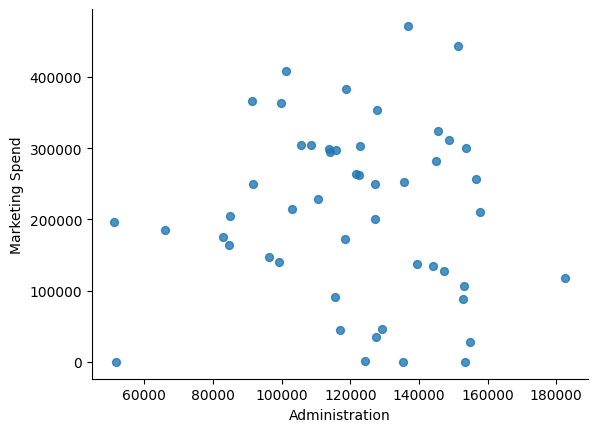

In [ ]:


from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Administration', y='Marketing Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

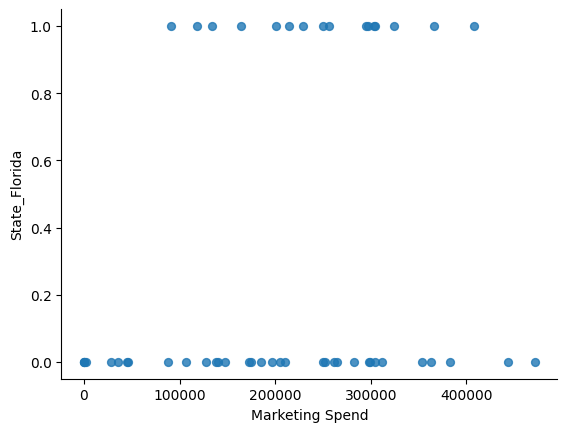

In [ ]:


from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Marketing Spend', y='State_Florida', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
model=LinearRegression()

In [ ]:
#MODEL BUILDING
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred_train=model.predict(x_train)

In [ ]:
r2_score(y_test,y_pred)

0.9358680970046243

In [ ]:
#ANOTHER WAY
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred_train1 = model1.predict(x_train)
r2_score(y_test,y_pred1)

0.9410321006745647

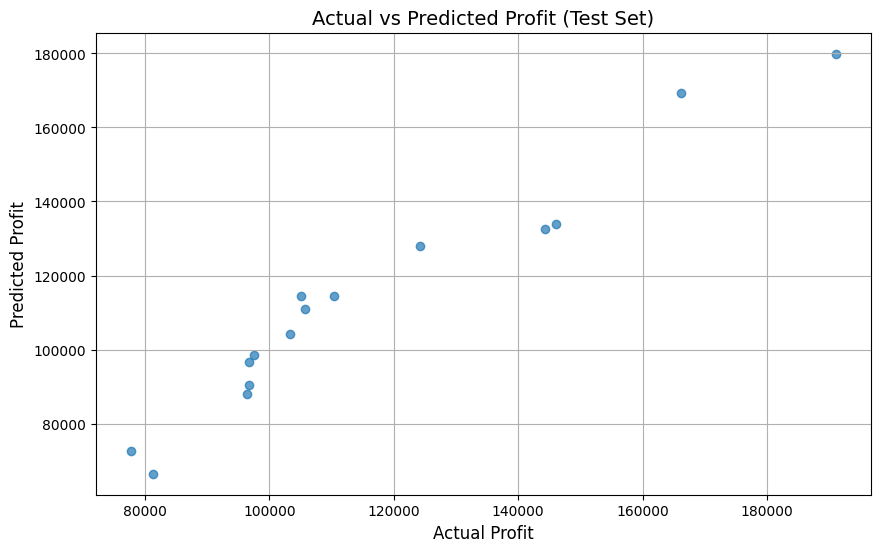

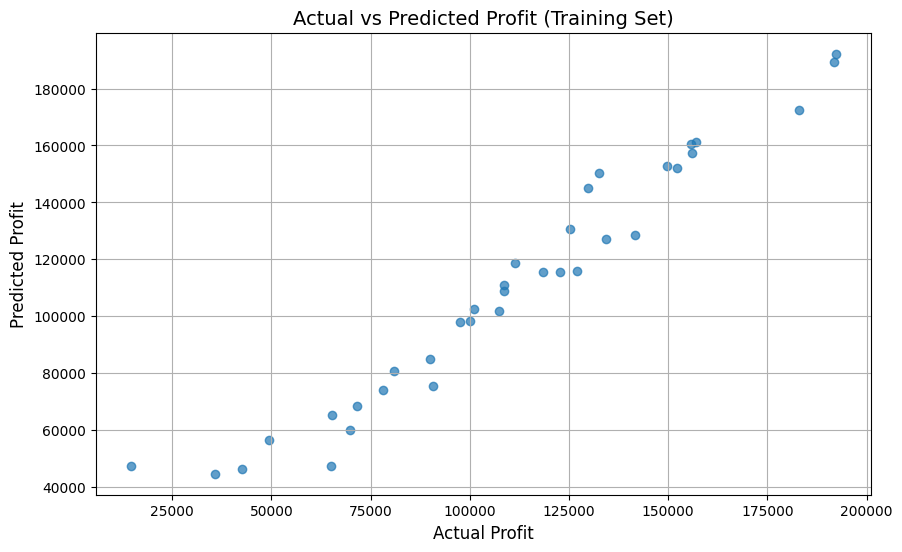

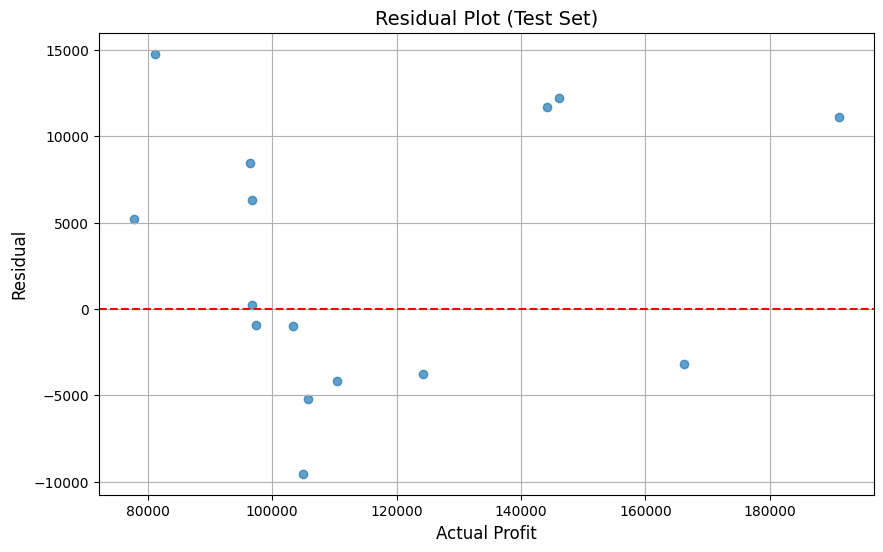

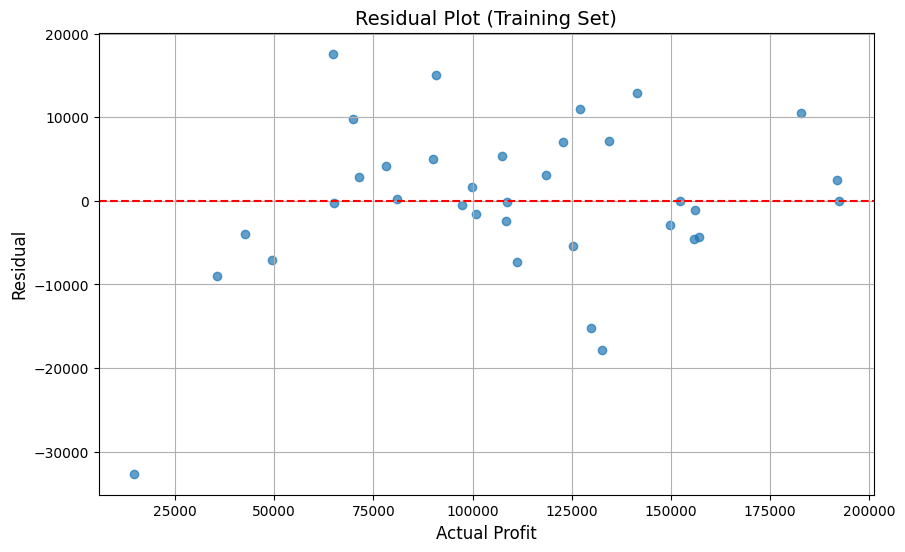

In [ ]:


# Plot the predicted values vs the actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Profit", fontsize=12)
plt.ylabel("Predicted Profit", fontsize=12)
plt.title("Actual vs Predicted Profit (Test Set)", fontsize=14)
plt.grid(True)
plt.show()

# Plot the predicted values vs the actual values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.xlabel("Actual Profit", fontsize=12)
plt.ylabel("Predicted Profit", fontsize=12)
plt.title("Actual vs Predicted Profit (Training Set)", fontsize=14)
plt.grid(True)
plt.show()

# Plot the residuals for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, alpha=0.7)
plt.xlabel("Actual Profit", fontsize=12)
plt.ylabel("Residual", fontsize=12)
plt.title("Residual Plot (Test Set)", fontsize=14)
plt.grid(True)
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Plot the residuals for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train - y_pred_train, alpha=0.7)
plt.xlabel("Actual Profit", fontsize=12)
plt.ylabel("Residual", fontsize=12)
plt.title("Residual Plot (Training Set)", fontsize=14)
plt.grid(True)
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
